<a href="https://colab.research.google.com/github/MarkzDG/Codigos_oceano/blob/main/Tabla_Mareas/Tabla_de_Mareas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este código, se aborda un análisis detallado de datos de mareas registrados cada hora desde enero hasta mayo de 1986 para la localidad de Mar de Ajó. Comenzamos explorando la estructura y características de los datos. Luego, aplicamos técnicas de análisis armónico para descomponer las series temporales y comprender sus componentes fundamentales.

Después de comprender el comportamiento armónico de las mareas, utilizamos este conocimiento para realizar predicciones sobre su evolución futura. Experimentamos con diferentes configuraciones, incluida la variación en la cantidad de armónicos empleados en los modelos, evaluando así su impacto en la precisión de las predicciones.

El análisis culmina en la creación de una tabla de mareas que presenta de manera concisa las predicciones resultantes. Este enfoque sistemático nos brinda una visión profunda de los datos de mareas, desde su exploración inicial hasta la generación de pronósticos confiables que pueden informar decisiones en diversos contextos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
#@title Carga del archivo { form-width: "10%" }
!wget https://raw.githubusercontent.com/lupalon/Mareas2022/main/3_MDAjo.xlsx
mda=pd.read_excel(r'3_MDAjo.xlsx')
fechi = pd.DatetimeIndex(pd.date_range(mda.FECHA.iloc[0], periods=len(mda), freq='1H'))
mda.set_index(fechi, inplace=True)

--2023-08-20 22:08:31--  https://raw.githubusercontent.com/lupalon/Mareas2022/main/3_MDAjo.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70821 (69K) [application/octet-stream]
Saving to: ‘3_MDAjo.xlsx’

3_MDAjo.xlsx        100%[===================>]  69.16K  --.-KB/s    in 0.01s   

2023-08-20 22:08:31 (5.01 MB/s) - ‘3_MDAjo.xlsx’ saved [70821/70821]



## Exploración de los datos

In [ ]:
mda.OBS.mean()

90.62928348909658

In [ ]:
mda.describe().round(3)

,OBS
count,2568.000
mean,90.629
std,40.683
min,-22.000
25%,62.000
50%,89.000
75%,120.000
max,221.000


In [ ]:
mda.FECHA.iloc[0]

Timestamp('1984-06-01 00:00:00')

In [ ]:
mda.FECHA.iloc[-1]

Timestamp('1984-09-15 23:00:00')

In [ ]:
mda

,FECHA,OBS
1984-06-01 00:00:00,1984-06-01 00:00:00,107
1984-06-01 01:00:00,1984-06-01 01:00:00,83
1984-06-01 02:00:00,1984-06-01 02:00:00,73
1984-06-01 03:00:00,1984-06-01 03:00:00,59
1984-06-01 04:00:00,1984-06-01 04:00:00,68
...,...,...
1984-09-15 19:00:00,1984-09-15 19:00:00,17
1984-09-15 20:00:00,1984-09-15 20:00:00,22
1984-09-15 21:00:00,1984-09-15 21:00:00,46
1984-09-15 22:00:00,1984-09-15 22:00:00,68


##Tengo datos cada una hora desde el 4 enero del 86 hasta el 16 de mayo del 86



Las frecuencias angulares (sigmas) de la TDE en orden m2,s2, n2, k2, k1, o1, p1

In [3]:
sigmas= ([0, 28.984104, 30.000000, 28.439729, 30.082137, 15.041069, 13.943036, 14.958931])

In [12]:
serie=pd.read_excel(r'3_MDAjo.xlsx',index_col=0)

In [5]:
serie=mda.OBS.values

In [6]:
serie

array([107,  83,  73, ...,  46,  68,  83])

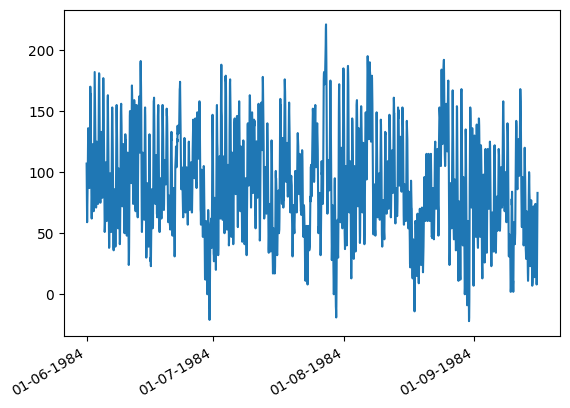

In [8]:
plt.plot(mda.index, serie)
# set monthly locator
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate()

## Aplicación de Analisis Armónico

In [9]:
#Series supongo que es un array,idem sigmas, dt el delta temporal en horas
def AnAr(series,sigmas,dt):
  Q=len(sigmas)
  T=len(series)
  s=series#[0:(T-1+T%2)] #En caso de que sea par, tiramos el último
  T=len(s)
  #t=np.linspace(-(T//2),T//2,len(s))
  t=np.linspace(0,len(s)*dt,len(s))
  eleA=[]
  eleB=[]
  for i in range(Q):
    eleA.append(np.cos(np.radians(sigmas[i]*t)))
    eleB.append(np.sin(np.radians(sigmas[i]*t)))
  eleA=np.array(eleA)
  eleB=np.array(eleB)
  ELE=np.concatenate((eleA.T,eleB.T),axis=1)
  vemosELE=np.linalg.lstsq(ELE,s,rcond=None)
  R=np.around(np.sqrt(vemosELE[0][0:Q]**2+vemosELE[0][Q::]**2),4)
  a=np.around(np.arctan2(vemosELE[0][Q::],vemosELE[0][0:Q]),4)
  a=a*180/np.pi
  a[a<0]=a[a<0]+360
  a=np.around(a,4)
  return(R,a)


In [14]:
dt= 1
R,a=AnAr(serie,sigmas,dt)
print('R(m):', R)
print('a(°):', a)

R(m): [[90.7013]
 [30.7772]
 [ 6.8611]
 [11.3293]
 [ 3.7779]
 [ 6.7166]
 [18.3881]
 [ 3.5419]]
a(°): [[  0.    ]
 [311.8544]
 [340.2616]
 [205.0321]
 [244.1136]
 [ 37.7293]
 [267.9142]
 [284.4612]]


In [15]:
!wget https://raw.githubusercontent.com/lupalon/Mareas2022/main/Componentes.txt
compo=pd.read_csv(r'Componentes.txt',delim_whitespace=True)
compo.sort_values(by='NRO',inplace=True)
compo[0:20]

--2023-08-20 22:12:44--  https://raw.githubusercontent.com/lupalon/Mareas2022/main/Componentes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4760 (4.6K) [text/plain]
Saving to: ‘Componentes.txt’

Componentes.txt     100%[===================>]   4.65K  --.-KB/s    in 0s      

2023-08-20 22:12:45 (64.7 MB/s) - ‘Componentes.txt’ saved [4760/4760]



,NRO,NOMBRE,VELOCIDAD
36,1.0,M2,28.9841
43,2.0,S2,30.0000
32,3.0,N2,28.4397
45,4.0,K2,30.0821
16,5.0,K1,15.0411
9,6.0,O1,13.9430
14,7.0,P1,14.9589
62,8.0,M4,57.9682
66,9.0,MS4,58.9841
33,10.0,NU2,28.5126


In [16]:
sigmas2=compo.VELOCIDAD.iloc[0:20].values
np.set_printoptions(suppress=True)
sigmas2

array([28.9841, 30.    , 28.4397, 30.0821, 15.0411, 13.943 , 14.9589,
       57.9682, 58.9841, 28.5126, 27.9682, 29.5285, 13.3987, 15.    ,
        0.041 ,  0.0821,  0.5443,  1.0158,  1.098 , 57.4238])

In [17]:
R20,a20=AnAr(serie,sigmas2,dt)
R.T,R20.round(4)

(array([[90.7013, 30.7772,  6.8611, 11.3293,  3.7779,  6.7166, 18.3881,
          3.5419]]),
 array([[ 31.1343],
        [  6.9337],
        [ 14.3421],
        [  3.8072],
        [  3.5596],
        [ 18.0313],
        [  3.235 ],
        [  2.6944],
        [  1.7658],
        [  5.7745],
        [  1.2777],
        [  1.4059],
        [  6.0286],
        [  8.7498],
        [145.5778],
        [ 51.1904],
        [  4.8775],
        [  9.8709],
        [  4.6458],
        [  1.1618]]))

In [18]:
a, a20

(array([[  0.    ],
        [311.8544],
        [340.2616],
        [205.0321],
        [244.1136],
        [ 37.7293],
        [267.9142],
        [284.4612]]),
 array([[311.9403],
        [340.9778],
        [196.2601],
        [244.4745],
        [356.3216],
        [267.4559],
        [184.9557],
        [128.3254],
        [163.4305],
        [ 81.0964],
        [235.84  ],
        [265.0494],
        [156.0508],
        [ 15.0287],
        [ 21.5088],
        [234.9749],
        [138.9251],
        [246.1647],
        [131.872 ],
        [ 17.4294]]))

In [19]:
ts=np.linspace(0,len(serie)*dt,len(serie))

In [20]:
def pred(R,a,t,sigma):
    Q=len(R)
    ondas=pd.DataFrame()
    for i in range(Q):
        ondas.insert(i,i,(R[i])*np.cos(np.deg2rad(sigma[i]*t-a[i])))
    suma=ondas.sum(axis=1).values
    prediccion=pd.DataFrame(np.around(suma,4))
    mapping = {prediccion.columns[0]:'Altura Predicha con ' + str(len(sigma)) + ' armónicos (cm)'}
    prediccion = prediccion.rename(columns=mapping)
    fechi = pd.date_range('1984-06-01 00:00:00', periods=len(prediccion), freq='1H')
    prediccion.set_index(fechi, inplace=True)
    return prediccion

In [21]:
R20

array([[ 31.1343],
       [  6.9337],
       [ 14.3421],
       [  3.8072],
       [  3.5596],
       [ 18.0313],
       [  3.235 ],
       [  2.6944],
       [  1.7658],
       [  5.7745],
       [  1.2777],
       [  1.4059],
       [  6.0286],
       [  8.7498],
       [145.5778],
       [ 51.1904],
       [  4.8775],
       [  9.8709],
       [  4.6458],
       [  1.1618]])

## Con todo el analisis anterior podemos proceder a calcular las predicciones

In [24]:
pred20=pred(R20,a20,ts,sigmas2)
pred20

,Altura Predicha con 20 armónicos (cm)
1984-06-01 00:00:00,107.5181
1984-06-01 01:00:00,91.5334
1984-06-01 02:00:00,75.1401
1984-06-01 03:00:00,60.1825
1984-06-01 04:00:00,50.6633
...,...
1984-09-15 19:00:00,20.2976
1984-09-15 20:00:00,41.2566
1984-09-15 21:00:00,62.8907
1984-09-15 22:00:00,78.2883


In [25]:
pred7=pred(R[0:6],a[0:6],ts,sigmas[0:6])
pred7

,Altura Predicha con 6 armónicos (cm)
1984-06-01 00:00:00,111.0927
1984-06-01 01:00:00,93.7406
1984-06-01 02:00:00,76.6336
1984-06-01 03:00:00,64.2275
1984-06-01 04:00:00,59.7242
...,...
1984-09-15 19:00:00,75.7661
1984-09-15 20:00:00,88.7685
1984-09-15 21:00:00,103.4790
1984-09-15 22:00:00,115.9324


In [26]:
pred8=pred(R,a,ts,sigmas)
pred8

,Altura Predicha con 8 armónicos (cm)
1984-06-01 00:00:00,111.3080
1984-06-01 01:00:00,88.6305
1984-06-01 02:00:00,66.4997
1984-06-01 03:00:00,49.6759
1984-06-01 04:00:00,41.6289
...,...
1984-09-15 19:00:00,58.7313
1984-09-15 20:00:00,74.8115
1984-09-15 21:00:00,93.4148
1984-09-15 22:00:00,110.3387


## Predicción con 7 armónicos, variando a(°)

In [28]:
predM2=pred([R[0]]+[R[1]],[a[0]]+[a[1]],ts,[sigmas[0]]+[sigmas[1]])
predS2=pred([R[0]]+[R[2]],[a[0]]+[a[2]],ts,[sigmas[0]]+[sigmas[2]])
predN2=pred([R[0]]+[R[3]],[a[0]]+[a[3]],ts,[sigmas[0]]+[sigmas[3]])
predK2=pred([R[0]]+[R[4]],[a[0]]+[a[4]],ts,[sigmas[0]]+[sigmas[4]])
predK1=pred([R[0]]+[R[5]],[a[0]]+[a[5]],ts,[sigmas[0]]+[sigmas[5]])
predO1=pred([R[0]]+[R[6]],[a[0]]+[a[6]],ts,[sigmas[0]]+[sigmas[6]])
predP1=pred([R[0]]+[R[7]],[a[0]]+[a[7]],ts,[sigmas[0]]+[sigmas[7]])

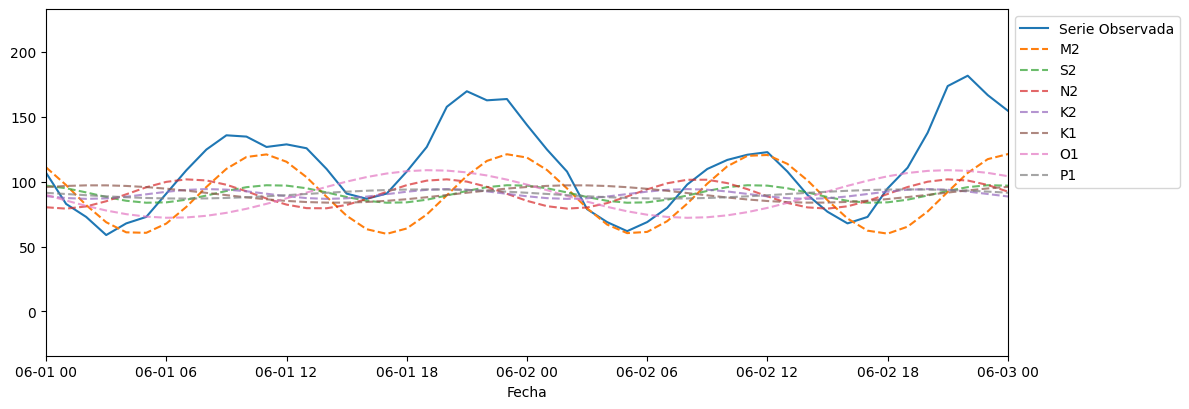

In [35]:
fig, axs = plt.subplots(1, 1, figsize=(12, 4))

axs.plot(fechi, serie, label='Serie Observada')
axs.plot(fechi, predM2.values, '--', label='M2')
axs.plot(fechi, predS2.values, '--', label='S2', alpha=0.7)
axs.plot(fechi, predN2.values, '--', label='N2', alpha=0.7)
axs.plot(fechi, predK2.values, '--', label='K2', alpha=0.7)
axs.plot(fechi, predK1.values, '--', label='K1', alpha=0.7)
axs.plot(fechi, predO1.values, '--', label='O1', alpha=0.7)
axs.plot(fechi, predP1.values, '--', label='P1', alpha=0.7)

axs.set(xlim=[mda.FECHA.iloc[0], mda.FECHA.iloc[48]])

# Configurar como se muestran los meses
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# Configurar como se muestran las fechas
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m H%-M%'))

# Configuración del grafico
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.tight_layout()
plt.xlabel('Fecha')
plt.show()

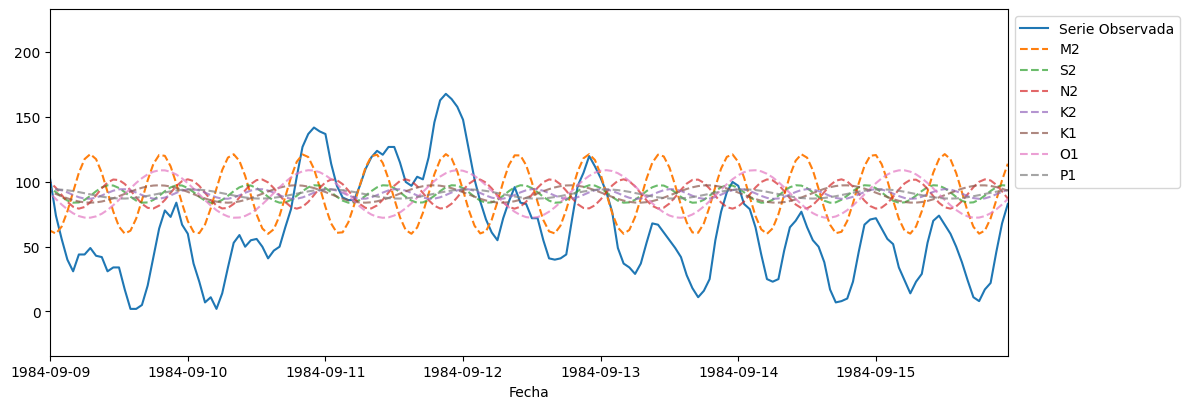

In [34]:
fig,axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(fechi,serie, label='Serie Observada')
axs.plot(fechi,predM2.values,'--', label = 'M2')
axs.plot(fechi,predS2.values,'--', label = 'S2',alpha = 0.7)
axs.plot(fechi,predN2.values,'--', label = 'N2',alpha = 0.7)
axs.plot(fechi,predK2.values,'--', label = 'K2',alpha = 0.7)
axs.plot(fechi,predK1.values,'--', label = 'K1',alpha = 0.7)
axs.plot(fechi,predO1.values,'--', label = 'O1',alpha = 0.7)
axs.plot(fechi,predP1.values,'--', label = 'P1',alpha = 0.7)
axs.set(xlim=[mda.FECHA.iloc[mda.index.get_loc(mda.FECHA['1984-09-09 00:00:00'])], mda.FECHA.iloc[-1]])
# Configurar como se muestran los meses
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# Configurar como se muestran las fechas
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m H%-M%'))

# Configuración del grafico
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.tight_layout()
plt.xlabel('Fecha')
plt.show()

## Variación de la cantidad de armónicos utilizados

Predicción al inicio del dataset con 7 y 8 armónicos

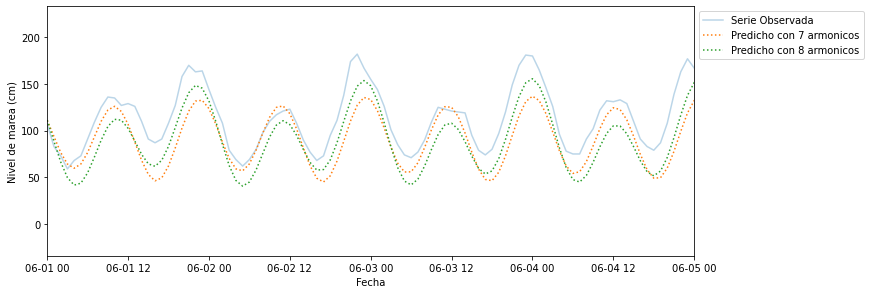

In [ ]:
fig,axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(fechi,serie, label='Serie Observada', alpha = 0.3)
#axs.plot(fechi,pred20.values,'--', label = 'Predicho con 20 armónicos')
axs.plot(fechi,pred7.values,':', label ='Predicho con 7 armonicos')
axs.plot(fechi,pred8.values,':', label ='Predicho con 8 armonicos')
axs.set(xlim=[mda.FECHA.iloc[0],mda.FECHA.iloc[24*4]])
# Configurar como se muestran los meses
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# Configurar como se muestran las fechas
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m H%-M%'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# Configuración del grafico
#plt.gcf().autofmt_xdate()
plt.legend(loc = 'upper right')
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.tight_layout()
plt.xlabel('Fecha')
plt.ylabel('Nivel de marea (cm)')
plt.show()

Predicción al inicio del dataset con 8 y 20 armónicos

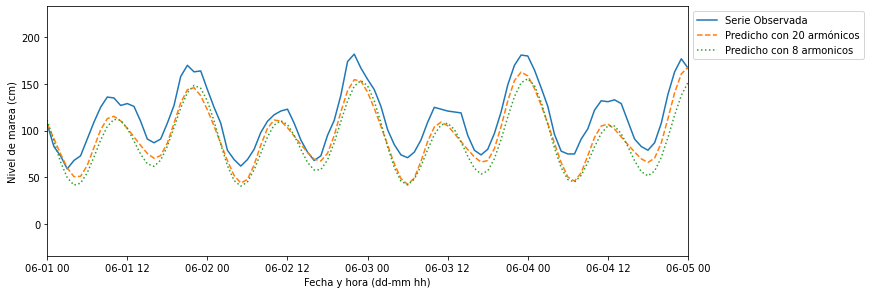

In [ ]:
fig,axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(fechi,serie, label='Serie Observada')
axs.plot(fechi,pred20.values,'--', label = 'Predicho con 20 armónicos')
axs.plot(fechi,pred8.values,':', label ='Predicho con 8 armonicos')
axs.set(xlim=[mda.FECHA.iloc[0],mda.FECHA.iloc[24*4]])
# set monthly locator
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# set formatter
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m H%-M%'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# set font and rotation for date tick labels
#plt.gcf().autofmt_xdate()
plt.legend(loc = 'upper right')
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.tight_layout()
plt.xlabel('Fecha y hora (dd-mm hh)')
plt.ylabel('Nivel de marea (cm)')
plt.show()

Predicción al al final del dataset con 7 y 8 armónicos

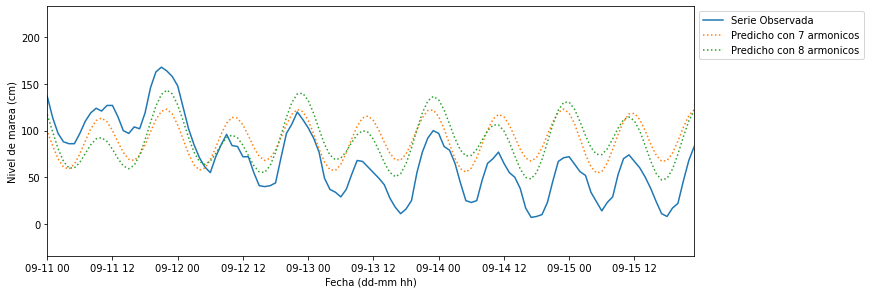

In [ ]:
fig,axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(fechi,serie, label='Serie Observada')
axs.plot(fechi,pred7.values,':', label ='Predicho con 7 armonicos')
axs.plot(fechi,pred8.values,':', label ='Predicho con 8 armonicos')
axs.set(xlim=[mda.FECHA.iloc[mda.index.get_loc(mda.FECHA['1984-09-11 00:00:00'])], mda.FECHA.iloc[-1]])

plt.legend(loc = 'upper right')
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.tight_layout()
plt.xlabel('Fecha (dd-mm hh)')
plt.ylabel('Nivel de marea (cm)')
plt.show()

## Creación de la tabla de mareas

In [ ]:
t=np.linspace(0,len(serie)*dt,len(serie))

In [ ]:
predi=pred(R,a,t,sigmas)

In [ ]:
predi

,Altura Predicha con 8 armónicos (cm)
1984-06-01 00:00:00,111.3080
1984-06-01 01:00:00,88.6305
1984-06-01 02:00:00,66.4997
1984-06-01 03:00:00,49.6759
1984-06-01 04:00:00,41.6289
...,...
1984-09-15 19:00:00,58.7313
1984-09-15 20:00:00,74.8115
1984-09-15 21:00:00,93.4148
1984-09-15 22:00:00,110.3387
